<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Decision_trees(Fraudcheck).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = r"/content/Fraud_check.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data['Taxable_Income_Category'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [8]:
categorical_vars = ['Undergrad', 'Marital.Status', 'Urban']
data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

In [9]:
X = data_encoded.drop(['Taxable.Income', 'Taxable_Income_Category'], axis=1)
y = data_encoded['Taxable_Income_Category']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

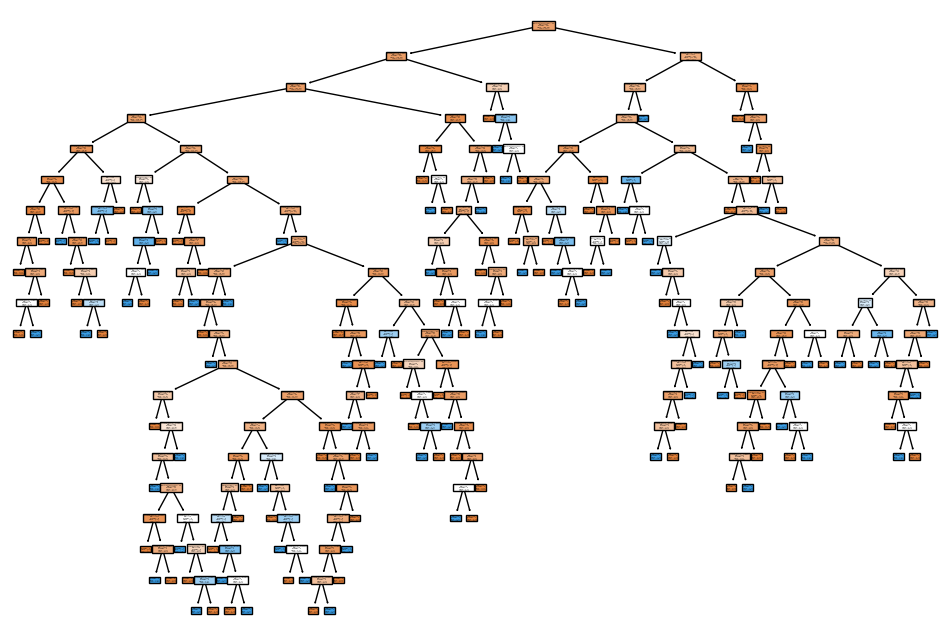

In [12]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()